# LFRic Iris data manipulation and visualisation practical

Let's apply what we've learned about data processing and visualisation of LFRic data in Iris and PyVista with the two exercises. \

The aim is to use the prompts to write the code yourself, but we have also provided a separate notebook containing the answers if you are stuck \

All the information needed to write the code for this practical can be found in the notebooks in the first part of this practical \

Note: this is delivered in Jupyter labs, but sometime the PyVista and GeoVista plotting is laggy in labs. If you prefer you can run in ipython.



## Exercise 1 - Regrid LFRic to UM and plot data 

In this exercise you will take LFRic data, regrid it to UM data and then plot the differences

**Step 1** To begin, we need to import the neccesary packages that we will need for this exercise.

In [5]:
%matplotlib inline
import pyvista as pv
import geovista as gv
import geovista.theme
import iris.quickplot as qplt
import iris
from geovista import GeoPlotter
from esmf_regrid.experimental.unstructured_scheme import MeshToGridESMFRegridder, GridToMeshESMFRegridder
from iris.experimental.ugrid.load import PARSE_UGRID_ON_LOAD
pv.rcParams["use_ipyvtk"] = True
iris.FUTURE.datum_support = True  # avoids some warnings


The pv_conversions script contains two functions which convert LFRic cubes to pyvista objects. Load these two functions:

In [2]:
from pv_conversions import pv_from_lfric_cube

**Step 2** Use iris.load_cube to load in the lfric data above, and select the diagnostic 'surface_air_pressure'. Print the cube - is it a mesh or grid? \
    (hint: you will need to use PARSE_UGRID_ON_LOAD.context() )

In [7]:
# Define the location of the data and file names
data_path = '/scratch/bfock/example_data_iris-mesh-tutorial'
data_path = '/scratch/bfock/example_data_u-ct674/'

lfric_path = data_path + '20210324T0000Z_lf_ugrid.nc'
um_path = data_path + '20210324T0000Z_um_latlon.nc'

with PARSE_UGRID_ON_LOAD.context():
    lfric_rho = iris.load_cube(lfric_path, 'surface_air_pressure')
print(lfric_rho)

surface_air_pressure / (Pa)         (time: 24; -- : 13824)
    Dimension coordinates:
        time                             x        -
    Mesh coordinates:
        latitude                         -        x
        longitude                        -        x
    Auxiliary coordinates:
        forecast_period                  x        -
    Mesh:
        name                        Topology data of 2D unstructured mesh
        location                    face
    Scalar coordinates:
        forecast_reference_time     2021-03-24 00:00:00
    Cell methods:
        point                       time
    Attributes:
        Conventions                 'CF-1.7'
        description                 'Created by xios'
        interval_operation          '6 h'
        interval_write              '6 h'
        online_operation            'instant'
        title                       'Created by xios'


**Step 4** Select the first timestep from the data so we have a 2D cube

In [8]:
lfric_rho_t0 = lfric_rho[0]

**Step 3** Transform the LFRic cube into a pyvista object using one of the functions from pv_conversions

In [9]:
lfric_pv = pv_from_lfric_cube(lfric_rho_t0)

**Step 5** Use GeoPlotter to plot the data using PyVista. You will need to use plotter.show() to display the plot. \

You can now observe Surface Air Pressue on a 3D globe. 

In [10]:
# Plot the data using pyvista
plotter = GeoPlotter()
_ = plotter.add_mesh(lfric_pv)
plotter.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

**Step 6** Now, lets regrid some LFRic data onto a lat/lon grid \

Use iris.load_cube to load the reference grid and print the cube. You can use the equivelent UM data loaded above for this. 

In [14]:
um_rho = iris.load_cube(um_path, 'surface_air_pressure')
print(um_rho)

surface_air_pressure / (Pa)         (time: 24; latitude: 144; longitude: 192)
    Dimension coordinates:
        time                             x             -               -
        latitude                         -             x               -
        longitude                        -             -               x
    Auxiliary coordinates:
        forecast_period                  x             -               -
    Scalar coordinates:
        forecast_reference_time     2021-03-24 00:00:00
    Attributes:
        Conventions                 'CF-1.7'
        STASH                       m01s00i409
        source                      'Data from Met Office Unified Model'
        um_version                  '12.2'


**Step 7** Create a regridder by using MeshToGridESMRegridder. Make sure the mesh and grid are the correct way round, consult the regridding section of the notebooks for help.

In [15]:
# Create the regrider
regridder = MeshToGridESMFRegridder(lfric_rho_t0, um_rho)

**Step 8** Now, regrid the LFRic data using the regridder you created. Print the result - is your LFRic data regridded?

In [16]:
result = regridder(lfric_rho_t0)
print(result)

surface_air_pressure / (Pa)         (latitude: 144; longitude: 192)
    Dimension coordinates:
        latitude                             x               -
        longitude                            -               x
    Scalar coordinates:
        forecast_period             21600 seconds
        forecast_reference_time     2021-03-24 00:00:00
        time                        2021-03-24 06:00:00
    Cell methods:
        point                       time
    Attributes:
        Conventions                 'CF-1.7'
        description                 'Created by xios'
        interval_operation          '6 h'
        interval_write              '6 h'
        online_operation            'instant'
        title                       'Created by xios'


**Step 9** Using qplt.pcolormesh plot the regridded LFRic data

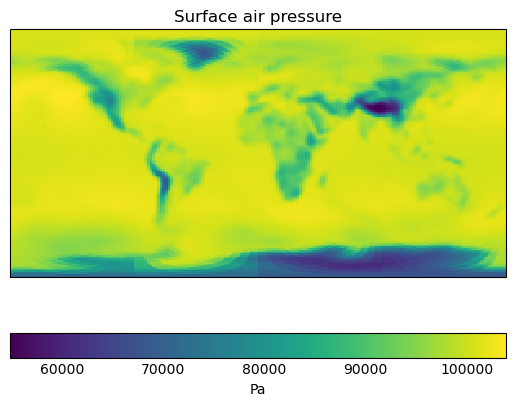

In [17]:
qplt.pcolormesh(result)

**Step 10** We can use the UM data loaded as reference for the regridding to compare to the reggrided LFRic data.\
Now select the first timestep of the UM data loaded in step 6

In [18]:
um_rho_t0 = um_rho[0]

**Step 11** Now calulate the difference between the LFRic regridded data and native UM data

In [19]:
difference = result - um_rho_t0

**Step 12** Now plot the original UM data and the regridded LFRic data and the difference side by side. \
(hint: use plt.subplot(1,3,1) and try adding a title and coastlines to the plot)

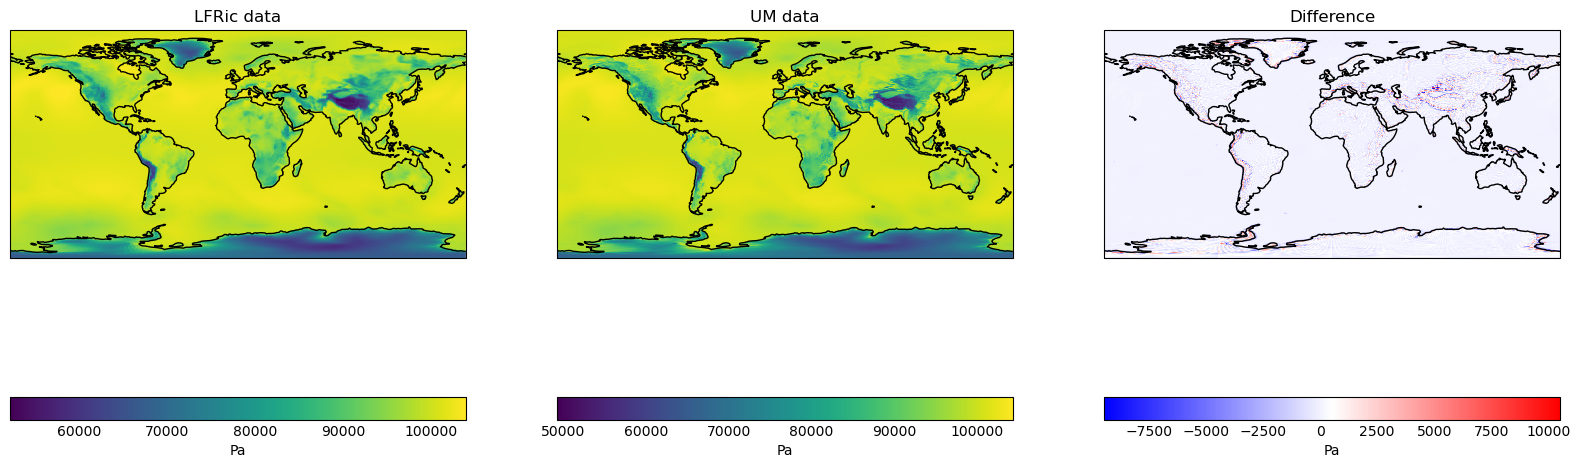

In [19]:
qplt.plt.figure(figsize=(20,12))

qplt.plt.subplot(1, 3, 1)
qplt.pcolormesh(result)
qplt.plt.title("LFRic data")
qplt.plt.gca().coastlines()

qplt.plt.subplot(1, 3, 2)
qplt.pcolormesh(um_rho_t0)
qplt.plt.title("UM data")
qplt.plt.gca().coastlines()

qplt.plt.subplot(1, 3, 3)
qplt.pcolormesh(difference, cmap="bwr")
qplt.plt.title('Difference')
qplt.plt.gca().coastlines()

qplt.plt.show()